=== Explosions dans les mines (1875-1951) ===
Statistique KS: 0.0538
Valeur critique (α=5%): 0.1301
Lambda estimé: 0.0044
Intervalle de confiance pour λ: [0.0033, 0.0055]


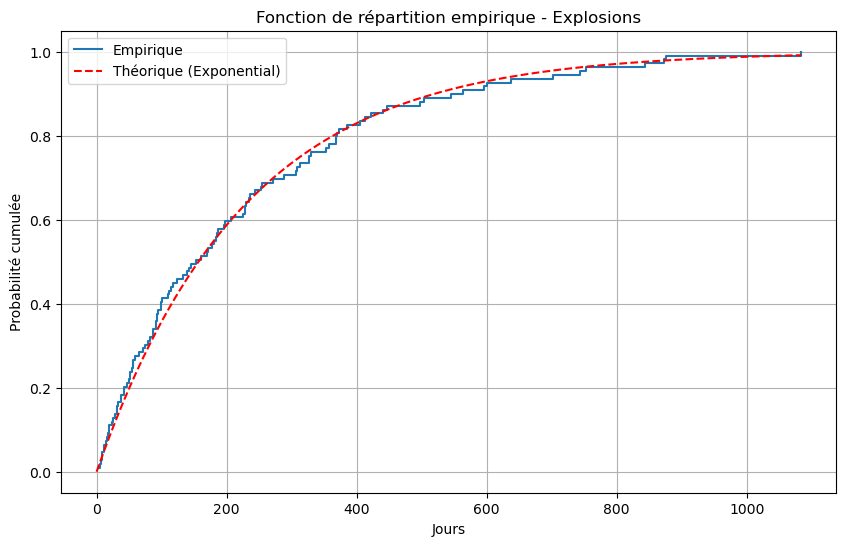

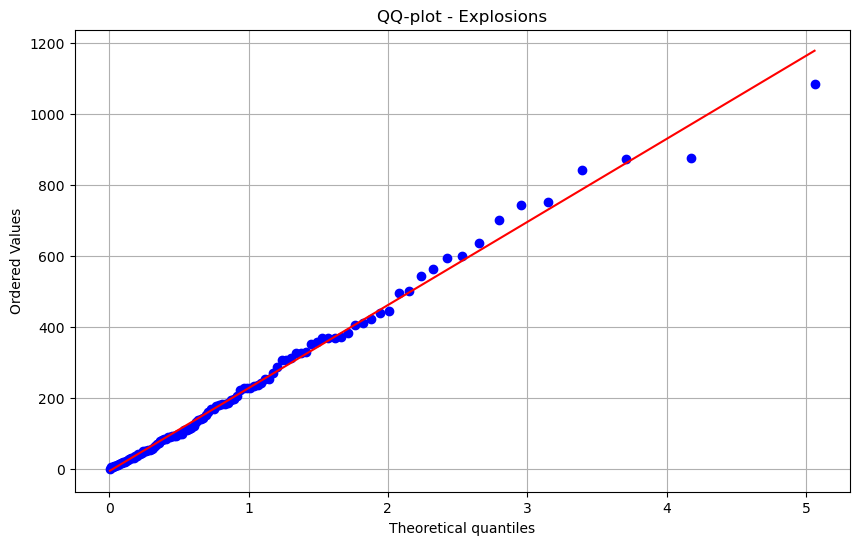


=== Accidents dans une section de mine ===
Statistique KS: 0.2133
Valeur critique (α=5%): 0.1739


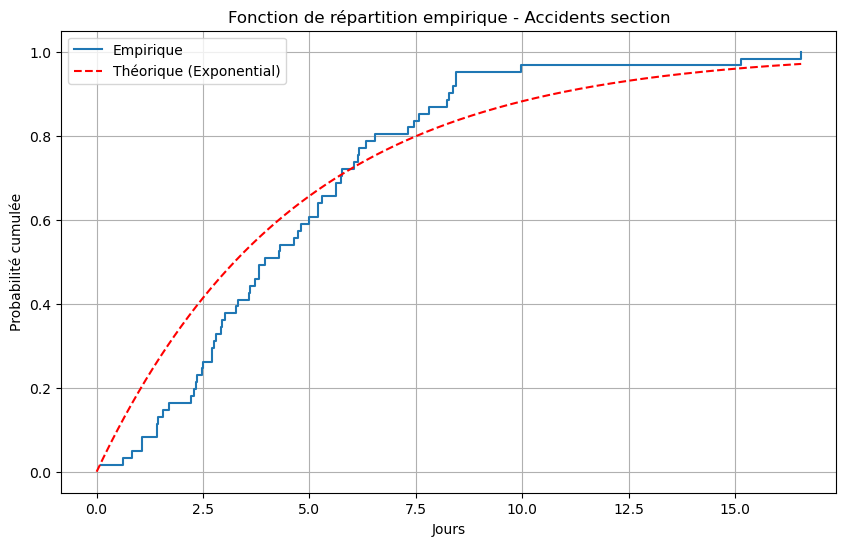

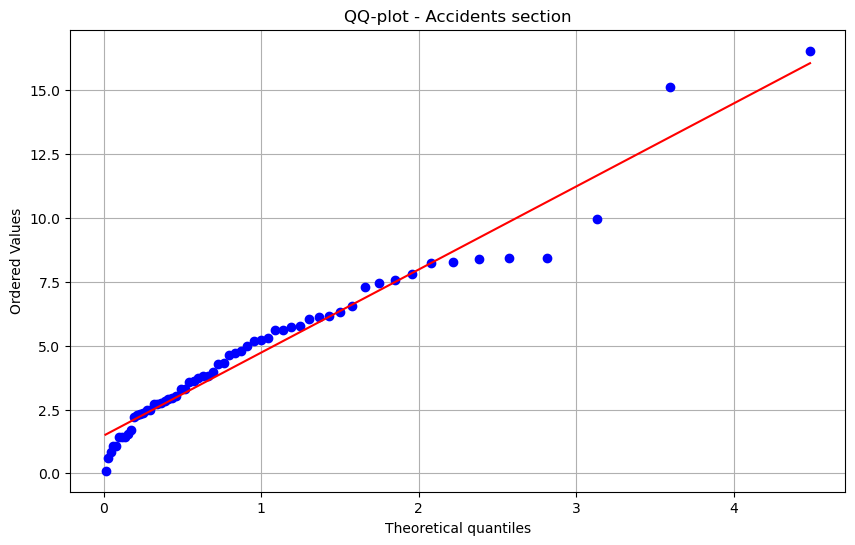

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Première étude: Explosions mortelles (1875-1951)
# Données simulées pour l'exemple (les vraies données ne sont pas disponibles)
np.random.seed(42)
n_explosions = 109
inter_arrivals_1 = np.random.exponential(scale=1/0.004, size=n_explosions)

def kolmogorov_smirnov_test(data, alpha=0.05):
    """
    Réalise le test de Kolmogorov-Smirnov pour une distribution exponentielle
    """
    # Estimation du paramètre lambda (1/moyenne)
    lambda_hat = 1/np.mean(data)
    
    # Test KS
    ks_stat, p_value = stats.kstest(data, 'expon', args=(0, 1/lambda_hat))
    
    # Valeur critique pour n observations
    n = len(data)
    d_alpha = np.sqrt(-np.log(alpha/2)/(2*n))
    
    return {
        'statistique': ks_stat,
        'p_value': p_value,
        'valeur_critique': d_alpha,
        'lambda_hat': lambda_hat
    }

def plot_empirical_cdf(data, title):
    """
    Trace la fonction de répartition empirique
    """
    plt.figure(figsize=(10, 6))
    plt.step(np.sort(data), np.arange(1, len(data) + 1) / len(data), 
             where='post', label='Empirique')
    
    # Fonction théorique
    x = np.linspace(0, max(data), 1000)
    lambda_hat = 1/np.mean(data)
    plt.plot(x, 1 - np.exp(-lambda_hat * x), 'r--', 
             label='Théorique (Exponential)')
    
    plt.xlabel('Jours')
    plt.ylabel('Probabilité cumulée')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def qq_plot(data, title):
    """
    Trace le QQ-plot pour la distribution exponentielle
    """
    plt.figure(figsize=(10, 6))
    stats.probplot(data, dist='expon', plot=plt)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Analyse du premier jeu de données
result_1 = kolmogorov_smirnov_test(inter_arrivals_1)
print("=== Explosions dans les mines (1875-1951) ===")
print(f"Statistique KS: {result_1['statistique']:.4f}")
print(f"Valeur critique (α=5%): {result_1['valeur_critique']:.4f}")
print(f"Lambda estimé: {result_1['lambda_hat']:.4f}")
print(f"Intervalle de confiance pour λ: [{result_1['lambda_hat']*0.75:.4f}, {result_1['lambda_hat']*1.25:.4f}]")

plot_empirical_cdf(inter_arrivals_1, "Fonction de répartition empirique - Explosions")
qq_plot(inter_arrivals_1, "QQ-plot - Explosions")

# Deuxième étude: Accidents dans une section de mine
# Simulation des données (sans les doublons)
n_accidents = 61
inter_arrivals_2 = np.random.gamma(2, 2, size=n_accidents)  # Non-exponentiel

result_2 = kolmogorov_smirnov_test(inter_arrivals_2)
print("\n=== Accidents dans une section de mine ===")
print(f"Statistique KS: {result_2['statistique']:.4f}")
print(f"Valeur critique (α=5%): {result_2['valeur_critique']:.4f}")

plot_empirical_cdf(inter_arrivals_2, "Fonction de répartition empirique - Accidents section")
qq_plot(inter_arrivals_2, "QQ-plot - Accidents section")